In [1]:
import numpy as np
import pandas as pd
from osgeo import gdal
# from osgeo import gdal_array
from osgeo import osr
# import rasterio
# import rasterio.plot as plt
import matplotlib.pylab as plt
# from PIL import Image
# data=pd.read_excel(r'D:\Desktop\gee-double-LAI.xls',header=0,sheet_name='solver-param')

# data.head(10)
# data = data.set_index(['lat','lon'])

In [2]:
# size=data.lat.drop_duplicates().count()
data=pd.read_excel(r'D:\Desktop\data.xlsx',header=0,sheet_name='lat-lon-intital')
size=data.lat.count()
daset=np.array(data)

In [3]:
lon=daset[:,0].reshape(size,-1)
lat=daset[:,1].reshape(size,-1)
p0=daset[:,2].reshape(size,-1)
p1=daset[:,3].reshape(size,-1)
p2=daset[:,4].reshape(size,-1)
p3=daset[:,5].reshape(size,-1)
p4=daset[:,6].reshape(size,-1)
p5=daset[:,7].reshape(size,-1)

### tif with one bands

array=p0
xmin,ymin,xmax,ymax = [lon.min(),lat.min(),lon.max(),lat.max()]
nrows,ncols = np.shape(array)
xres = (xmax-xmin)/float(ncols)
yres = (ymax-ymin)/float(nrows)
geotransform=(xmin,xres,0,ymax,0, -yres) 
### geotransform=(463.3127165279165, 0, -20015109.353988, 0, -463.3127165274999, 10007554.676994)
### That's (top left x, w-e pixel resolution, rotation (0 if North is up), 
###        top left y, rotation (0 if North is up), n-s pixel resolution)

output_raster = gdal.GetDriverByName('GTiff').Create('p0.tif',ncols, nrows, 1 ,gdal.GDT_Float32)  # Open the file
output_raster.SetGeoTransform(geotransform)  # Specify its coordinates
srs = osr.SpatialReference()                 # Establish its coordinate encoding
srs.ImportFromEPSG(4326)                     # This one specifies WGS84 lat long.
                                             # Anyone know how to specify the 
                                             # IAU2000:49900 Mars encoding?
output_raster.SetProjection(srs.ExportToWkt())   # Exports the coordinate system to the file
output_raster.GetRasterBand(1).WriteArray(array) # Writes my array to the raster
output_raster.FlushCache()

In [4]:
# tif with multiply bands

array3=np.array([p0,p1,p2,p3,p4,p5])
xmin,ymin,xmax,ymax = [lon.min(),lat.min(),lon.max(),lat.max()]
bandsNum,nrows,ncols = np.shape(array3)
xres = (xmax-xmin)/float(ncols)
yres = (ymax-ymin)/float(nrows)
geotransform=(xmin,xres,0,ymax,0, -yres)

# ENVI
output_raster = gdal.GetDriverByName('GTiff').Create('D:\Desktop\intital.tif',ncols, nrows, bandsNum ,gdal.GDT_Float32)
output_raster.SetGeoTransform(geotransform)
srs = osr.SpatialReference()
srs.ImportFromEPSG(4326)

output_raster.SetProjection(srs.ExportToWkt())

for k in range(bandsNum):
    data=array3[k,:,:]
    output_raster.GetRasterBand(k+1).WriteArray(data)
    output_raster.GetRasterBand(k+1).SetDescription("p%s"%k)
    
output_raster.FlushCache()

In [11]:
filepath = 'D:\Desktop\intial_param_limit.tif'
dataset=gdal.Open(filepath)
im_width = dataset.RasterXSize #栅格矩阵的列数
im_height = dataset.RasterYSize #栅格矩阵的行数
im_bands = dataset.RasterCount #波段数
im_data = dataset.ReadAsArray(0,0,im_width,im_height)#获取数据
im_geotrans = dataset.GetGeoTransform()#获取仿射矩阵信息
im_proj = dataset.GetProjection()#获取投影信息

In [12]:
np.savetxt('D:\Desktop\intial_param_limit.txt',np.squeeze(im_data).T,fmt='%1.3f')

In [11]:
filepath = 'D:\Desktop\intital.tif'
mirband = rasterio.open(filepath)
mir = mirband.read(1).astype(float)
plt.figure(figsize=(10,8))
plt.imshow(mir, cmap='viridis')
plt.xticks([0,2,4,6,8],['$-79.24^{o}W$','$-79.23^{o}W$','$-79.22^{o}W$','$79.21^{o}W$','$-79.20^{o}W$'])

plt.yticks([0,2,4,6,8,10],
           ['$41.69^{o}N$','$41.68^{o}N$','$41.68^{o}N$','$41.67^{o}N$','$41.66^{o}N$','$41.65^{o}N$'])
plt.colorbar()
plt.title('GEE-LAI-p0')
# plt.xlabel('lat')
# plt.ylabel('lon')

NameError: name 'rasterio' is not defined

Text(0.5, 1.0, 'GEE-LAI-p0')

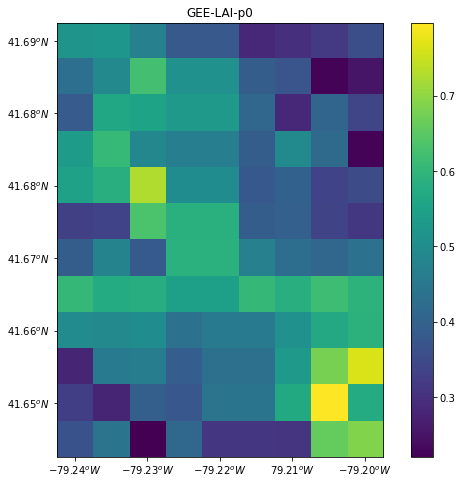

In [6]:
filepath = 'D:\Desktop\gee1.tif'
dataset=gdal.Open(filepath)
im_width = dataset.RasterXSize #栅格矩阵的列数
im_height = dataset.RasterYSize #栅格矩阵的行数
im_bands = dataset.RasterCount #波段数
im_data = dataset.ReadAsArray(0,0,im_width,im_height)#获取数据
im_geotrans = dataset.GetGeoTransform()#获取仿射矩阵信息
im_proj = dataset.GetProjection()#获取投影信息
# print(im_geotrans)
# print(im_proj)

output = gdal.GetDriverByName('GTiff').Create('gee-trans.tif',9, 12, im_bands ,gdal.GDT_Float32)
output.SetGeoTransform(im_geotrans)
output.SetProjection(im_proj)
# srs = osr.SpatialReference()
# srs.ImportFromEPSG(4326)
# output.SetProjection(srs.ExportToWkt())
for k in range(im_bands):
    data=im_data[k,0:12,2:11]
    output.GetRasterBand(k+1).WriteArray(data)
    output.GetRasterBand(k+1).SetDescription("p%s"%k)
output.FlushCache()

filepath1 = 'D:\Desktop\python_parallel\jupyter\gee-trans.tif'

mirband = rasterio.open(filepath1)
mir = mirband.read(1).astype(float)/10
plt.figure(figsize=(10,8))
plt.imshow(mir, cmap='viridis')
plt.xticks([0,2,4,6,8],
          ['$-79.24^{o}W$','$-79.23^{o}W$','$-79.22^{o}W$','$79.21^{o}W$','$-79.20^{o}W$'])

plt.yticks([0,2,4,6,8,10],
          ['$41.69^{o}N$','$41.68^{o}N$','$41.68^{o}N$','$41.67^{o}N$','$41.66^{o}N$','$41.65^{o}N$'])
plt.colorbar()
plt.title('GEE-LAI-p0')

Text(0.5, 1.0, 'GEE-LAI-p0')

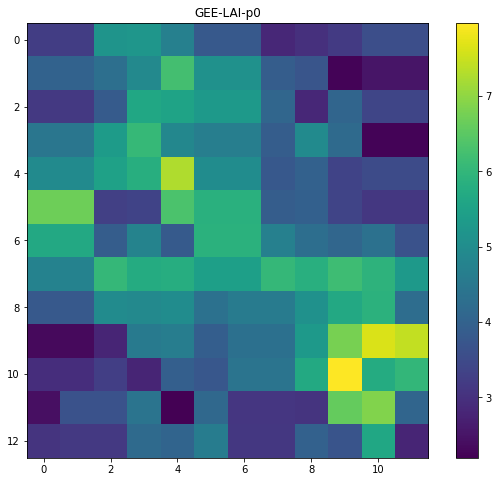

In [16]:
filepath = 'D:\Desktop\gee1.tif'
mirband = rasterio.open(filepath)
mir = mirband.read(1).astype(float)
plt.figure(figsize=(10,8))
plt.imshow(mir, cmap='viridis')
# plt.xticks([0,2,4,6,8],['$-79.24^{o}W$','$-79.23^{o}W$','$-79.22^{o}W$','$79.21^{o}W$','$-79.20^{o}W$'])

# plt.yticks([0,2,4,6,8,10],
#            ['$41.69^{o}N$','$41.68^{o}N$','$41.68^{o}N$','$41.67^{o}N$','$41.66^{o}N$','$41.65^{o}N$'])
plt.colorbar()
plt.title('GEE-LAI-p0')